<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">First Look:</span> Data Cleaning</h1>
<hr>
Welcome to the workbook for <span style="color:royalblue">First Look: Data Cleaning</span>! 

Better data beats better algorithms.
* Use this as a "blueprint" for efficient data cleaning.
* Different types of data will require different types of cleaning.
* However, the systematic approach laid out in this lesson can always be a good starting point.


<br><hr id="toc">

### In this lesson...

In this lesson, we'll cover the essential data cleaning steps:
0. [Examine Data](#examine)
1. [Drop unwanted observations](#drop)
2. [Fix structural errors](#structural)
3. [Remove unwanted outliers](#outliers)
4. [Label missing categorical data](#missing-categorical)
5. [Flag and fill missing numerical data](#missing-numeric)

Finally, we'll save the cleaned dataframe to a new file so we can use it in other lessons.

<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

Next, let's import the dataset, just as we did in the previous lesson.

In [3]:
df = pd.read_csv('../data/real_estate_data.csv')

Now we're ready to jump into cleaning the data!

<br>

<br id="examine">

# 0. Examine Data

The initial step must always include some sort of examination of the structure of your dataset, this is to give you an idea of what columns / rows need to be cleaned / dropped.
<br>

**Basic Info**

In [6]:
# Examine Data Dimensions
df.shape

(1883, 26)

In [7]:
# Explore Data Types
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [8]:
# Display Head
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


**Distributions of numeric Features**

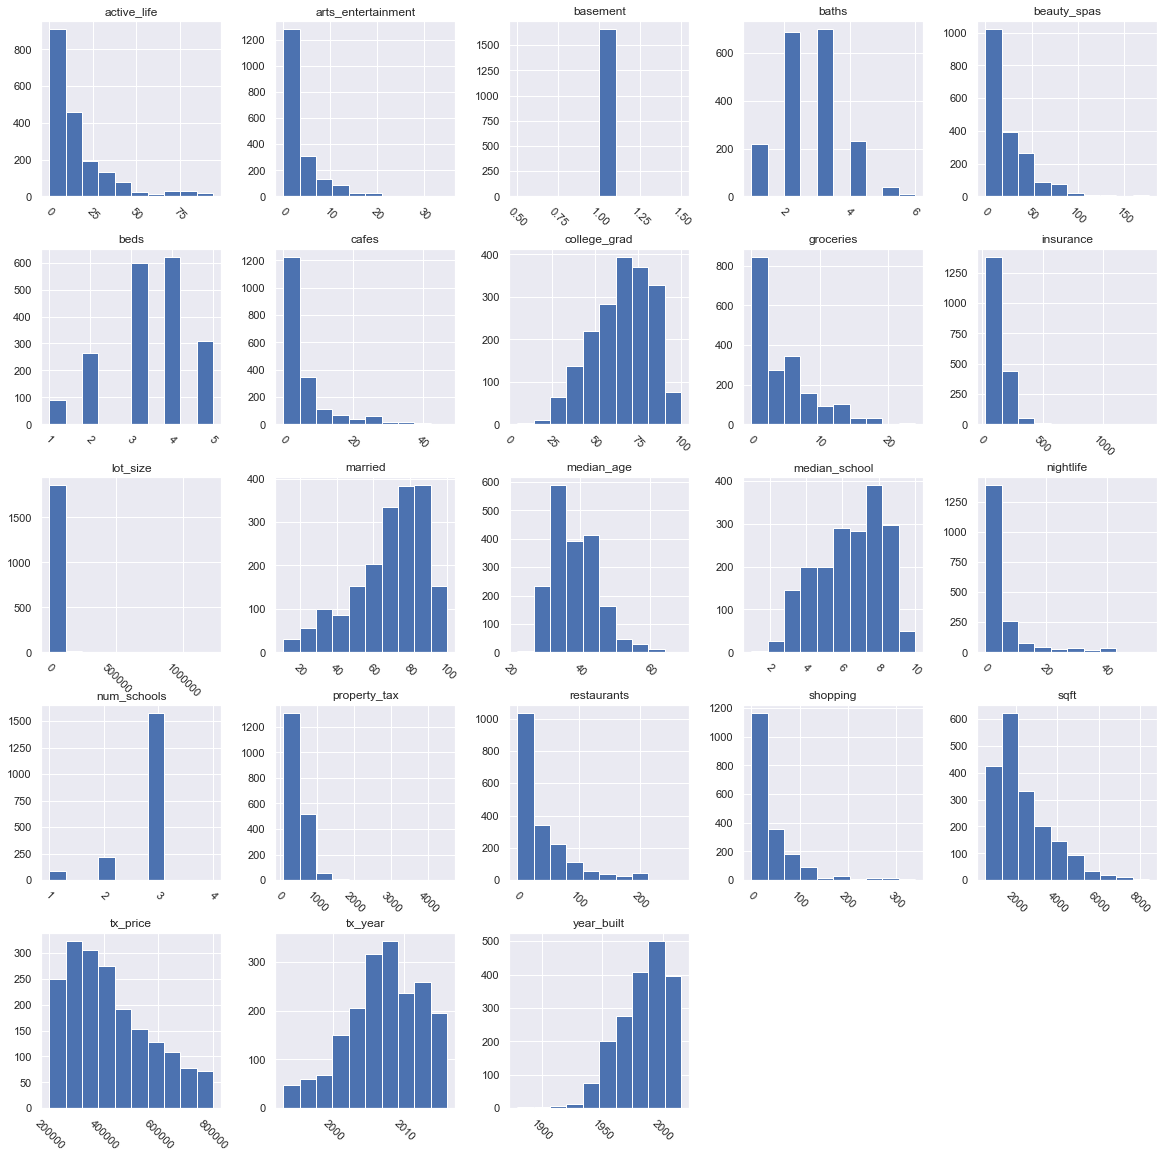

In [11]:
df.hist(xrot=-45, figsize=(20,20)) 
plt.show()

**Distributions of Categorical Features**

In [15]:
# Filter by Columns
cat_df = df.select_dtypes(include="object").head()


In [19]:
cat_df.head()

,property_type,exterior_walls,roof
0,Apartment / Condo / Townhouse,Wood Siding,NaN
1,Apartment / Condo / Townhouse,Brick,Composition Shingle
2,Apartment / Condo / Townhouse,Wood Siding,NaN
3,Apartment / Condo / Townhouse,Wood Siding,NaN
4,Apartment / Condo / Townhouse,Brick,NaN


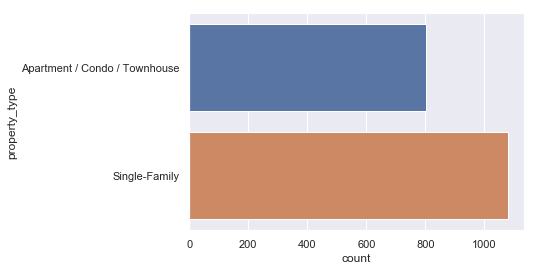

Apartment / Condo / Townhouse    5
Name: property_type, dtype: int64



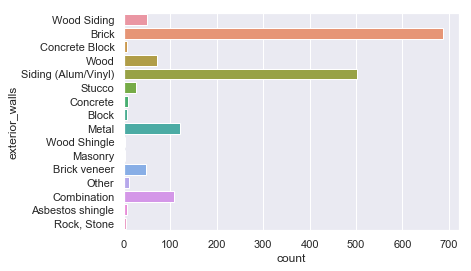

Wood Siding    3
Brick          2
Name: exterior_walls, dtype: int64



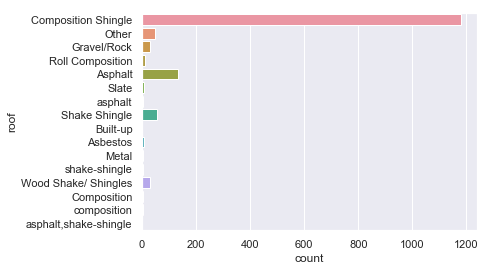

Composition Shingle    1
Name: roof, dtype: int64



In [17]:
for feature in cat_df: 
    sns.countplot(y=feature, data=df)
    plt.show()
    print(cat_df[feature].value_counts())
    print()

<br>

<br id="drop">

# 1. Drop unwanted observations

The first step to data cleaning is removing unwanted observations from your dataset.

<br>
First, drop duplicates in your dataframe.

In [21]:
# Print shape of dataframe
print(df.shape)

# Drop any duplicates
df.drop_duplicates(inplace=True) 

# Print shape of new dataframe to compare
print(df.shape)

(1883, 26)
(1883, 26)



<div style="text-align:center; margin: 40px 0 40px 0;">

[**Back to Contents**](#toc)
</div>

<br id="structural">

# 2. Fix Structural Errors

The next bucket under data cleaning involves fixing structural errors.

<br>

### Clean-up `basement`

In [22]:
# Display unique values of 'basement'
df['basement'].unique()

array([nan,  1.])

Fill missing <code style="color:steelblue">'basement'</code> values with the value <code style="color:crimson">0</code> to turn <code style="color:steelblue">'basement'</code> into a true `indicator` variable.

In [25]:
# Missing basement values should be 0
df['basement'] = df['basement'].fillna(0)
df['basement'] = df['basement'].fillna(0)

Confirm that we have a true indicator variable:

In [26]:
# Display unique values of 'basement'
df.basement.unique()

array([0., 1.])

In [28]:
df['basement'].isnull().sum()

0

<br>

### Clean-up `roof`

Next, There are some typos and inconsistent capitalization in the `roof` feature.

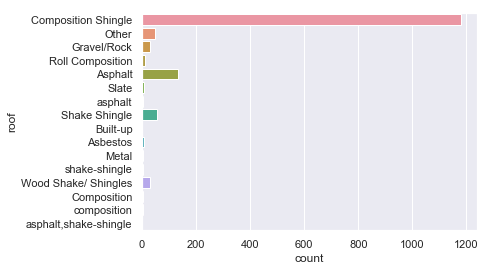

In [29]:
# Class distributions for 'roof'
sns.countplot(y='roof', data=df)


#### Make these changes:

In [35]:
df['roof'].value_counts(dropna=False)

Composition Shingle      1179
NaN                       354
Asphalt                   132
Shake Shingle              55
Other                      49
Gravel/Rock                30
Wood Shake/ Shingles       30
Roll Composition           12
Asbestos                    9
Slate                       9
asphalt                     5
Composition                 5
Metal                       4
composition                 4
shake-shingle               3
Built-up                    2
asphalt,shake-shingle       1
Name: roof, dtype: int64

* <code style="color:crimson">'composition'</code> should be <code style="color:crimson">'Composition'</code>
* <code style="color:crimson">'asphalt'</code> should be <code style="color:crimson">'Asphalt'</code>
* <code style="color:crimson">'shake-shingle'</code> should be <code style="color:crimson">'Shake Shingle'</code>
* We also might as well change <code style="color:crimson">'asphalt,shake-shingle'</code> to <code style="color:crimson">'Shake Shingle'</code>

In [38]:
# 'composition' should be 'Composition'
df['roof'] = df['roof'].replace(['composition', 'Composition'], 'Composition Shingle')

In [31]:
# 'asphalt' should be 'Asphalt'
df['roof'].replace('asphalt', 'Asphalt')

0                        NaN
1        Composition Shingle
2                        NaN
3                        NaN
4                        NaN
5                        NaN
6                        NaN
7                        NaN
8                        NaN
9                        NaN
10                       NaN
11                       NaN
12       Composition Shingle
13                       NaN
14                       NaN
15       Composition Shingle
16                       NaN
17       Composition Shingle
18                       NaN
19                       NaN
20                       NaN
21                       NaN
22       Composition Shingle
23       Composition Shingle
24       Composition Shingle
25                       NaN
26                       NaN
27                       NaN
28                       NaN
29       Composition Shingle
                ...         
1853     Composition Shingle
1854     Composition Shingle
1855     Composition Shingle
1856          

In [41]:
# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df['roof'] = df['roof'].replace(['shake-shingle','Asphalt','ashpalt, shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle')

<br>

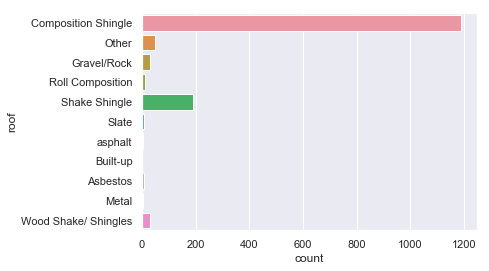

In [42]:
sns.countplot( y='roof' ,data=df) 
plt.show()

### Clean-up `exterior_walls`

Finally, we'll check for mislabeled classes. Plot the class distributions for <code style="color:steelblue">'exterior_walls'</code>.

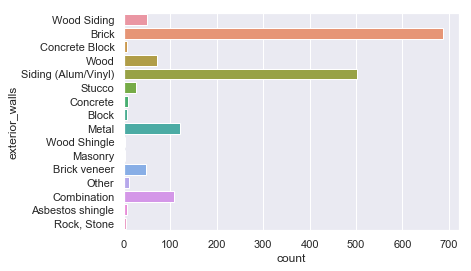

In [43]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

Let's fix these in the next exercise:
* <code style="color:crimson">'Rock, Stone'</code> should be <code style="color:crimson">'Masonry'</code>
* <code style="color:crimson">'Concrete'</code> and <code style="color:crimson">'Block'</code> should both just be <code style="color:crimson">'Concrete Block'</code>

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 2.1</span>

**First, replace any instances of <code style="color:steelblue">'Rock, Stone'</code> with <code style="color:steelblue">'Masonry'</code> instead.**
* Remember to do it inplace.

In [47]:
# 'Rock, Stone' should be 'Masonry'
df['exterior_walls'] = df['exterior_walls'].replace( "Rock, Stone", "Mansory")

<br>

**Next, replace any instances of <code style="color:steelblue">'Concrete'</code> or <code style="color:steelblue">'Block'</code> with <code style="color:steelblue">'Concrete Block'</code> instead.**
* Remember to do it inplace.

In [51]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df['exterior_walls'] = df['exterior_walls'].replace( ['Concrete', 'Block'], 'Concrete Block')

<br>

**Finally, plot the bar plot of <code style="color:steelblue">'exterior_walls'</code> to see its new distribution.**

In [45]:
# Class distributions for 'exterior_walls'

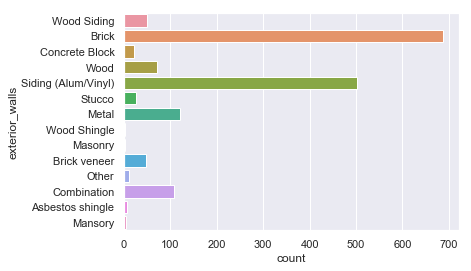

In [52]:
sns.countplot(y='exterior_walls', data=df)
plt.show()

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br id="outliers">

# 3. Remove unwanted outliers

Outliers can cause problems with certain types of models.

<br>
Start with a box plot of your target variable, since that's the variable that you're actually trying to predict.

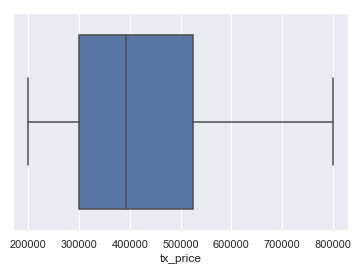

In [53]:
# Box plot of 'tx_price' using the Seaborn library
sns.boxplot(df['tx_price'])
plt.show()

To show more information, make violin plot of transaction price. 
* What's the difference between box plots and violin plots?

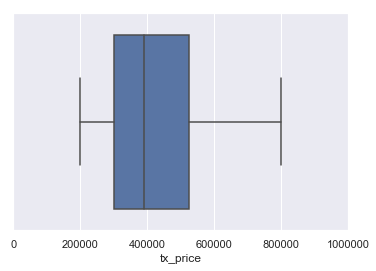

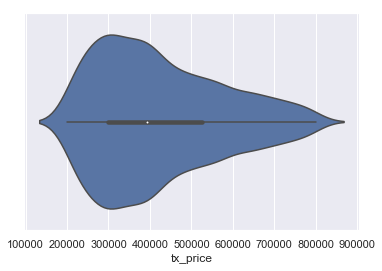

In [54]:
# Violin plot of 'tx_price' using the Seaborn library
sns.boxplot(df.tx_price)
plt.xlim(0, 1000000)
plt.show()

sns.violinplot(df.tx_price)
plt.show()

<br>

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 2.2</span>

**Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.**
* **Tip:** If you want to plot multiple charts in the same code cell, remember to separate them by <code style="color:steelblue">plt.show()</code>, or else they will overlap.

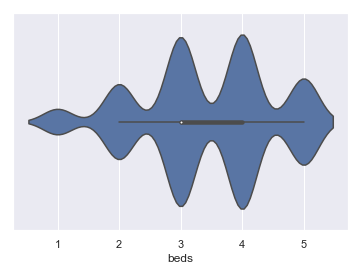

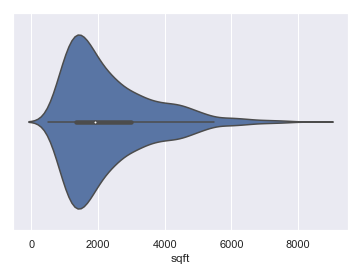

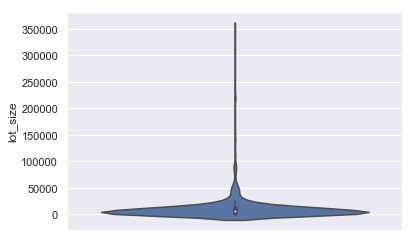

In [74]:
# Violin plot of beds
sns.violinplot(df['beds'])
plt.show()
# Violin plot of sqft
sns.violinplot(df['sqft'])
plt.show()
# Violin plot of lot_size
sns.violinplot(data=df, y='lot_size')
plt.show()

Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! 
* Look at its long and skinny tail.
* Let's look at the largest 5 lot sizes just to confirm.

<br>

**Sort <code style="color:steelblue">df['lot_size']</code> and display the top 5 samples.**
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.
* **Tip:** <code style="color:steelblue">.sort_values()</code> has an argument called <code style="color:steelblue">ascending=</code>. By default, it's <code style="color:steelblue">True</code>
* **Tip:** You can chain functions together. This exercise can be completed in 1 line of code.

In [72]:
# Sort df.lot_size and display the top 5 samples
df['lot_size'].sort_values(ascending=False).head(20)

1111    436471
1876    436035
1832    436035
1839    435600
1115    435600
1817    435600
1570    435600
1852    351529
1479    343252
682     260488
1705    231303
1878    224334
1880    217800
1837    217800
1486    217800
1578    217800
172     183387
1843    175111
696     160736
1457    153331
Name: lot_size, dtype: int64

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Holy smokes!

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, let's remove it so it doesn't interfere with our ability to model normal size properties.

<br>

**Remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.**
* You can use a boolean mask to do so (filter to keep only wanted observations)
* Overwrite the existing <code style="color:steelblue">df</code> object
* Print the length of the new <code style="color:steelblue">df</code> object.

In [73]:
# Remove lot_size outliers
df = df[df['lot_size'] < 400000]
# print length of df
df.shape


(1875, 26)

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br id="missing-categorical">

# 4. Label missing categorical data

It's finally time to address missing data.

<br>
First, find and count the missing categorical data.

In [22]:
df.select_dtypes(include='object').isnull().sum()
df.dtypes[df.dtypes == 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

In [4]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              354
dtype: int64

In the next exercise, we'll write a loop for labeling missing values in all of our categorical features.

<br><hr style="border-color:royalblue;background-color:royalblue;height:1px;">
## <span style="color:RoyalBlue">Exercise 2.3</span>

**Write a loop that fills all the missing values for categorical features with the value <code style="color:steelblue">'Missing'</code>.**
* **Tip:** There's a shortcut for looping through categorical column names:


<pre style="color:#bbb">
for column in <strong style="color:steelblue">df.select_dtypes(include=['object'])</strong>:
    # code block
</pre>

In [24]:
# Fill missing categorical values
for column in df.dtypes[df.dtypes == 'object'].index:
    df[column] = df[column].fillna('Missing')

**Now, display the number of missing values for each categorical feature.**

In [25]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">

<div style="text-align:center; margin: 40px 0 40px 0;">
    
[**Back to Contents**](#toc)
</div>

<br>

<br id="missing-numeric">

# 5. Flag and fill missing numeric data

Finally, let's flag and fill missing numeric data.

<br>
First, let's find and count missing values in numerical feature.

In [78]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

Well, it looks like we don't have any numerical features with missing values in this dataset.


<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
    
[**Back to Contents**](#toc)
</div>

<br>

### Finally, let's save the cleaned dataframe.

Let's save the new dataframe we worked hard to clean.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* We set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [79]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_real_estate.csv', index=None)

Now we have a clean dataset <code style="color:steelblue">'cleaned_real_estate.csv'</code> to use in the future!

<br>

Congratulations for making through the Data Cleaning lesson!

As a reminder, here are a few things you did in this lesson:
* You confirmed that the dataset doesn't have any duplicate and irrelevant observations.
* You fixed various structural errors, such as mislabeled classes.
* You removed an outlier after plotting violin plots.
* And you labeled missing data in your categorical features.

All of this cleaning will be extremely helpful. In the next lesson, <span style="color:royalblue">Lesson 3: Feature Engineering</span>, you'll use your cleaned dataset to create new features that will improve model performance.

<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
    
[**Back to Contents**](#toc)
</div>